# Linear Dimensionality Reduction, Clustering and Labeling

## Dimensionality reduction using automatic mathematical constructs, followed by clustering of the embeddings of multi-dimensional signal data in novel "reduced dimensional" feature spaces

In [1]:
#import various useful packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
import pandas as pd
%matplotlib inline

#importing dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import MDS
from sklearn.manifold import Isomap 
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
# import umap

#importing clustering packages
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

/Users/pgmenon/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [20]:
# /content/gdrive/MyDrive/2390--Spring2022/2390--Spring2022/Week05/spike_data.csv
import pandas as pd

df = pd.read_csv("spike_data.csv", header=None)
print(df.shape)
df.head()

(3636, 34)


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1687.40,1697.70,1085.0,792.40,1274.50,527.26,-4827.7,-15553.0,-27374.0,-33711.0,...,17661.0,16239.0,14269.0,11916.0,10035.0,9098.8,8325.90,6416.30,3121.00,-353.94
1,-518.44,-227.55,-1056.1,-1818.80,-1486.20,-1840.20,-6738.2,-17663.0,-30531.0,-38216.0,...,17821.0,17867.0,17582.0,16649.0,15344.0,14182.0,13126.00,11704.00,9837.50,8074.00
2,372.62,-545.55,-1721.7,-2910.60,-3609.20,-3838.30,-4207.1,-5112.2,-6163.2,-6635.3,...,-4047.5,-4007.8,-3810.6,-3281.6,-2386.5,-1380.9,-684.59,-517.98,-655.99,-604.69
3,182.17,-357.40,-1115.5,-1196.30,-1233.00,-4198.00,-12708.0,-25130.0,-35357.0,-37512.0,...,13373.0,12099.0,10839.0,9600.7,8615.3,7861.6,6967.00,5724.70,4409.60,3385.00
4,2857.90,2945.90,2132.3,796.86,-469.78,-1601.30,-3132.4,-5342.9,-7465.9,-8074.7,...,3261.4,2721.9,2783.5,3068.3,2963.1,2322.3,1579.50,1189.70,1174.70,1294.30


(3636, 34)


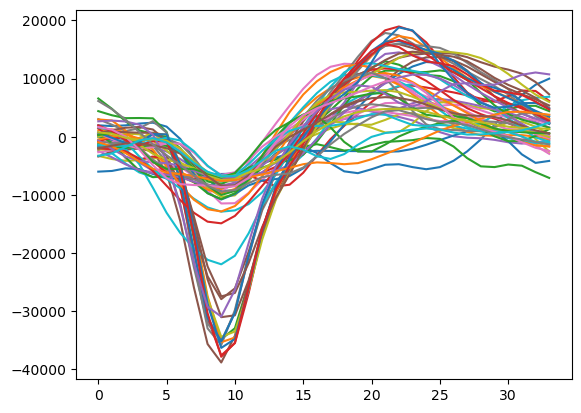

In [4]:
spike_data = df.to_numpy()
print(np.shape(spike_data))

# Create a random list of 50 signals out of the 3636 recordings and then plot these over time (column axis)
listRand = []
for i in range(50):
  listRand.append(random.randint(0,np.shape(spike_data)[0]))

plt.plot( spike_data[listRand,:].T)

plt.show()

## Lets normalize the spike data this time before we proceed with the dimensionality reduction based on what we learned in class today

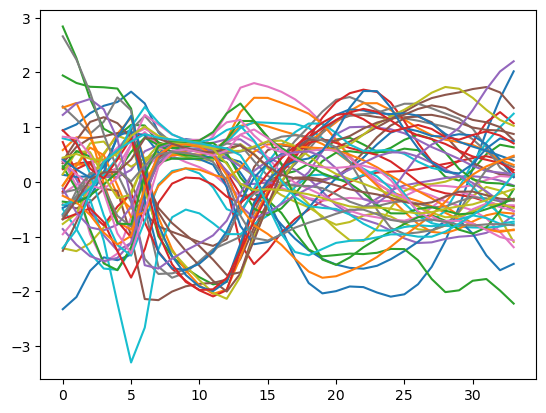

In [21]:
# normalize spike data
spike_data = spike_data - np.mean(spike_data, axis=0)
spike_data = spike_data / np.std(spike_data, axis=0)

plt.plot( spike_data[listRand,:].T)

plt.show()

# save the normalization mean and std to a pkl file for later use
import pickle
with open('spike_data_norm.pkl', 'wb') as f:
    pickle.dump([np.mean(spike_data, axis=0), np.std(spike_data, axis=0)], f)


In [6]:
#To initialize a PCA class instance
k = 5
pca_example = PCA(n_components=k) #Note: Use pca_example = PCA(n_components=m) to only compute for the largest m eigenmodes 

X = spike_data[listRand,:]

#To apply PCA to a data set
pca_example.fit(X)

#To return back it's projections onto the eigenvectors
projections = pca_example.transform(X)

# #To apply PCA to a data set and simultaneously return back it's projections onto the eigenvectors
# projections = pca_example.fit_transform(X)

#The (sorted from largest to smallest) eigenvalues are in the class variable:
example_pca_eigenvalues = pca_example.explained_variance_

#The fraction of the variance explained by each modes is given by:
example_pca_relative_variance = pca_example.explained_variance_ratio_

In [7]:
projections.shape

(50, 5)

Text(0.5, 1.0, 'PCA')

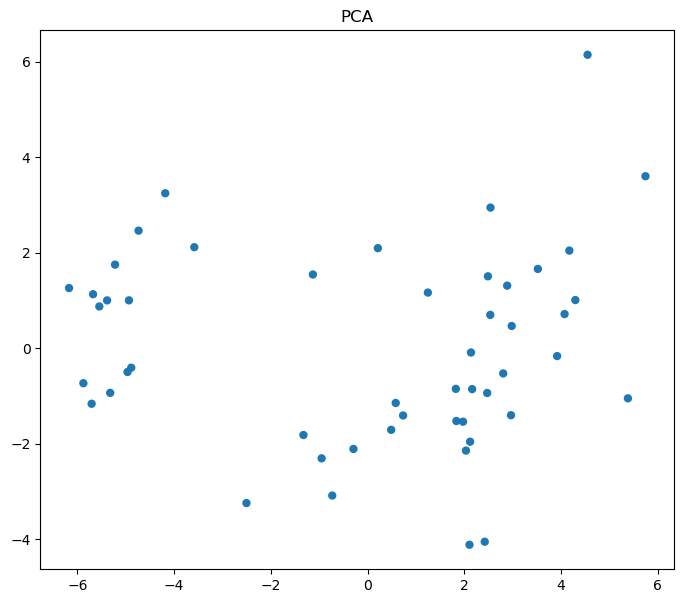

In [8]:
##PCA
fig = plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.scatter(projections[:,0],projections[:,1],edgecolor="none") 
plt.title("PCA")


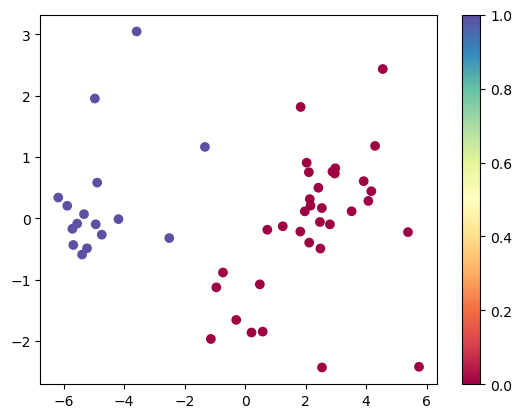

In [9]:
k = 2

km_example = KMeans(n_clusters=k)
km_example.fit(projections)
km_labels = km_example.predict(projections)

#To plot:
plt.scatter(projections[:,0],projections[:,4],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

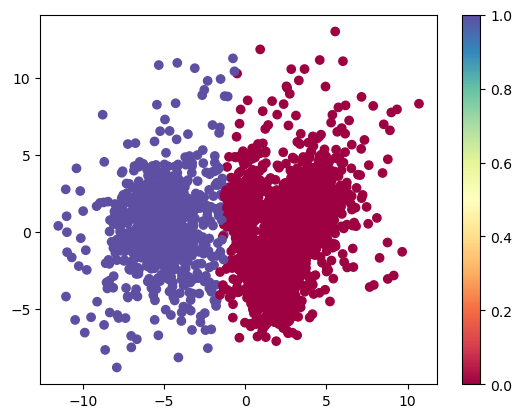

In [10]:
projections_ALLdata =  pca_example.transform(spike_data) 

km_labels = km_example.predict(projections_ALLdata)

#To plot:
plt.scatter(projections_ALLdata[:,0],projections_ALLdata[:,1],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

In [11]:
len(km_labels)

3636

In [14]:
# Save spkie data with listRand to a pkl file for loading later
import pickle
with open('spike_data.pkl', 'wb') as f:
    pickle.dump([spike_data, listRand], f)
    
# # Load spike data from pkl file
# import pickle
# with open('spike_data.pkl', 'rb') as f:
#     spike_data, listRand = pickle.load(f)

# Non-linear clustering and labeling

In [4]:
# Load spike data from pkl file
import pickle
with open('spike_data.pkl', 'rb') as f:
    spike_data, listRand = pickle.load(f)

Text(0.5, 1.0, 'PCA')

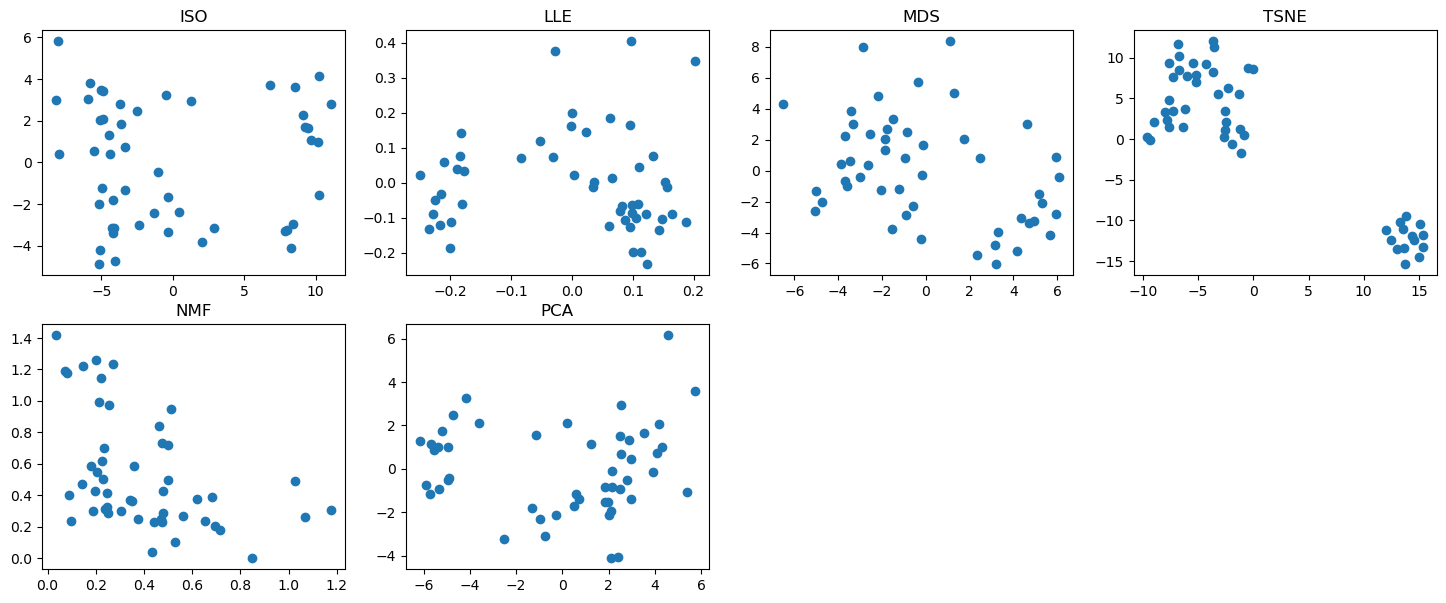

In [5]:
#importing dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import MDS
from sklearn.manifold import Isomap 
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np
# import umap

fig = plt.figure(figsize=(18,7))

##Isomap
plt.subplot(2,4,1)
digit_isomap = Isomap(n_components=2,n_neighbors=10) 
projections_iso = digit_isomap.fit_transform(spike_data[listRand,:])
plt.scatter(projections_iso[:,0],projections_iso[:,1])
plt.title('ISO')

##LLE
plt.subplot(2,4,2)
digit_LLE = LocallyLinearEmbedding(n_components=2,n_neighbors=20) 
projections_lle = digit_LLE.fit_transform(spike_data[listRand,:])
plt.scatter(projections_lle[:,0],projections_lle[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('LLE')

##MDS
plt.subplot(2,4,3)
digit_mds = MDS(n_components=2) 
projections_mds = digit_mds.fit_transform(spike_data[listRand,:])
plt.scatter(projections_mds[:,0],projections_mds[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('MDS')


#T-SNE
plt.subplot(2,4,4)
digit_tsne = TSNE(n_components=2,perplexity=10) #,method='exact') 
tsne_projections = digit_tsne.fit_transform(spike_data[listRand,:])
plt.scatter(tsne_projections[:,0],tsne_projections[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('TSNE')

##NMF
plt.subplot(2,4,5)
digit_nmf = NMF(n_components=2) 
projections_nmf = digit_nmf.fit_transform(np.abs(spike_data[listRand,:]))
plt.scatter(projections_nmf[:,0],projections_nmf[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('NMF')

##PCA
plt.subplot(2,4,6)
digit_pca = PCA(n_components=2) 
projections_pca = digit_pca.fit_transform(spike_data[listRand,:])
plt.scatter(projections_pca[:,0],projections_pca[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('PCA')

# ##Umap
# digit_umap = umap.UMAP(n_components=2,n_neighbors=40,min_dist=.05) 
# projections_umap = digit_umap.fit_transform(spike_data[listRand,:])
# plt.scatter(projections_umap[:,0],projections_umap[:,1]) #,c=Names,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
# plt.title('UMAP')
# plt.subplot(2,4,7)

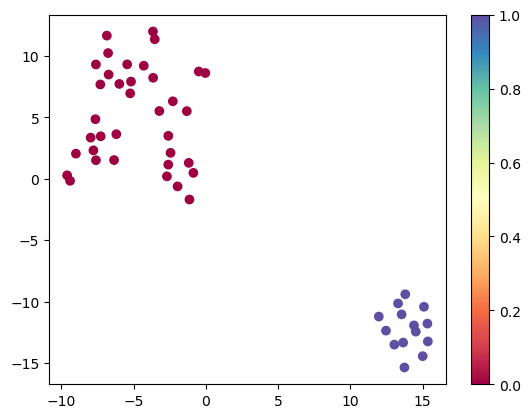

In [7]:
from sklearn.cluster import KMeans
k = 2

km_example = KMeans(n_clusters=k)
km_example.fit(tsne_projections)
km_labels = km_example.predict(tsne_projections)

#To plot:
plt.scatter(tsne_projections[:,0],tsne_projections[:,1],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

## Lets LEARN the cluster assignments from PCA + KMeans on the training data and then apply the same to the test data

In [12]:
# Create a single df with spike_data[listRand,:] and km_labels from TSNE for learning

import pandas as pd
learningFrame = pd.DataFrame(spike_data[listRand,:])
learningFrame['tsne_labels'] = km_labels

learningFrame

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,tsne_labels
0,0.942756,1.050519,1.256777,1.391234,1.460574,1.649571,1.435230,0.906532,0.658531,0.542501,...,-2.052375,-1.869183,-1.550370,-1.079381,-0.457584,0.241291,0.919437,1.524113,2.020611,0
1,0.581524,0.816397,0.801087,0.342724,-0.242194,-0.487726,-0.000980,0.427008,0.552526,0.569449,...,-0.271233,-0.348566,-0.443790,-0.563527,-0.684729,-0.784702,-0.857105,-0.893446,-0.880520,0
2,1.945542,1.808424,1.739160,1.729498,1.706258,1.340952,-0.038988,-0.992572,-1.365106,-1.575007,...,0.608423,0.579511,0.360501,0.092840,0.025259,0.221420,0.506751,0.680181,0.632634,1
3,0.233831,0.339275,0.363437,0.407743,0.537318,0.794372,0.881627,0.712773,0.668738,0.693564,...,0.201501,0.234346,0.282793,0.331367,0.379879,0.435493,0.471421,0.409529,0.168102,0
4,-0.599292,-0.338040,-0.043431,0.089124,0.089267,0.219172,0.560541,0.673020,0.692048,0.694303,...,-1.030787,-1.115520,-1.103188,-1.040575,-1.000065,-0.983445,-0.929903,-0.798526,-0.605195,0
5,-0.412149,-0.483585,-0.367772,-0.126756,-0.161141,-0.985237,-2.138972,-2.159026,-2.001976,-1.906430,...,1.181666,1.193492,1.091384,0.848166,0.563875,0.353091,0.225547,0.139835,0.116952,1
6,0.408178,-0.072159,-0.954359,-1.476800,-1.308216,-0.644699,0.229952,0.478846,0.495157,0.525702,...,-0.113638,-0.163491,-0.250528,-0.355905,-0.440424,-0.518374,-0.663319,-0.915167,-1.192397,0
7,1.379312,1.142281,0.879886,1.100126,1.545661,1.306712,-0.482661,-1.549015,-1.749571,-1.656555,...,1.161805,1.118860,1.062272,1.008875,0.935174,0.781195,0.557132,0.362653,0.274531,1
8,-1.211866,-1.263746,-1.120308,-0.832631,-0.537770,-0.179659,0.354186,0.576514,0.637396,0.656610,...,-0.166685,-0.048716,-0.039684,0.004754,0.095890,0.074984,-0.192281,-0.654014,-1.095044,0
9,-0.496587,-0.859945,-1.296970,-1.582403,-1.604316,-1.248474,-0.148449,0.513091,0.671418,0.676756,...,-0.391466,-0.621498,-0.752986,-0.801494,-0.818300,-0.831388,-0.834485,-0.812657,-0.762728,0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn import tree

# prepare the data
X=learningFrame.drop(['tsne_labels'],axis=1)
y=learningFrame['tsne_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# train the model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# test the model
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# Apply this model to the entire dataset
y_pred_all = clf.predict(spike_data)


In [29]:
y_pred_all

array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

(3636, 34)


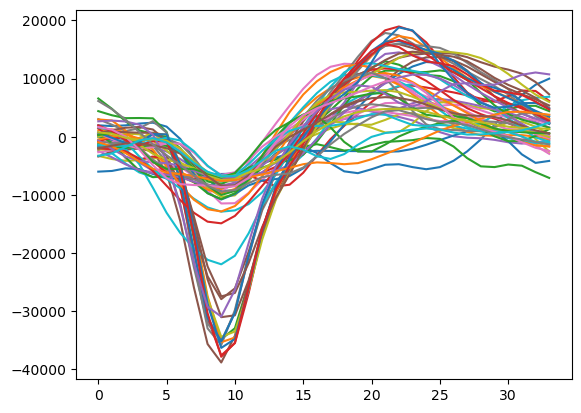

In [28]:
# Reload the normalization mean and std from pkl file
# import pickle
# with open('spike_data_norm.pkl', 'rb') as f:
#     mean, std = pickle.load(f)
    
# # Undo the normalization on the normalized dataset 
# """ 
# # normalize spike data
# spike_data = spike_data - np.mean(spike_data, axis=0)
# spike_data = spike_data / np.std(spike_data, axis=0)
# """

# spike_data_unnorm = spike_data * std + mean

# plt.plot( spike_data_unnorm[listRand,:].T)

# plt.show()

# /content/gdrive/MyDrive/2390--Spring2022/2390--Spring2022/Week05/spike_data.csv
import pandas as pd

df = pd.read_csv("spike_data.csv", header=None)
print(df.shape)

spike_data_unnorm = df.to_numpy()

plt.plot( spike_data_unnorm[listRand,:].T)
plt.show()

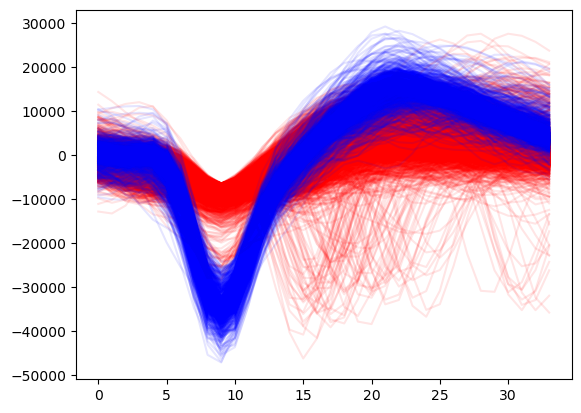

In [30]:
# color plt.plot( spike_data_unnorm[listRand,:].T) based on the clustering results in y_pred_all

# plot only y_pred_all == 0 in red
plt.plot( spike_data_unnorm[y_pred_all == 0,:].T, color='red', alpha=0.1)
# superimpose the rest of the data in blue
plt.plot( spike_data_unnorm[y_pred_all != 0,:].T, color='blue', alpha=0.1)
plt.show()

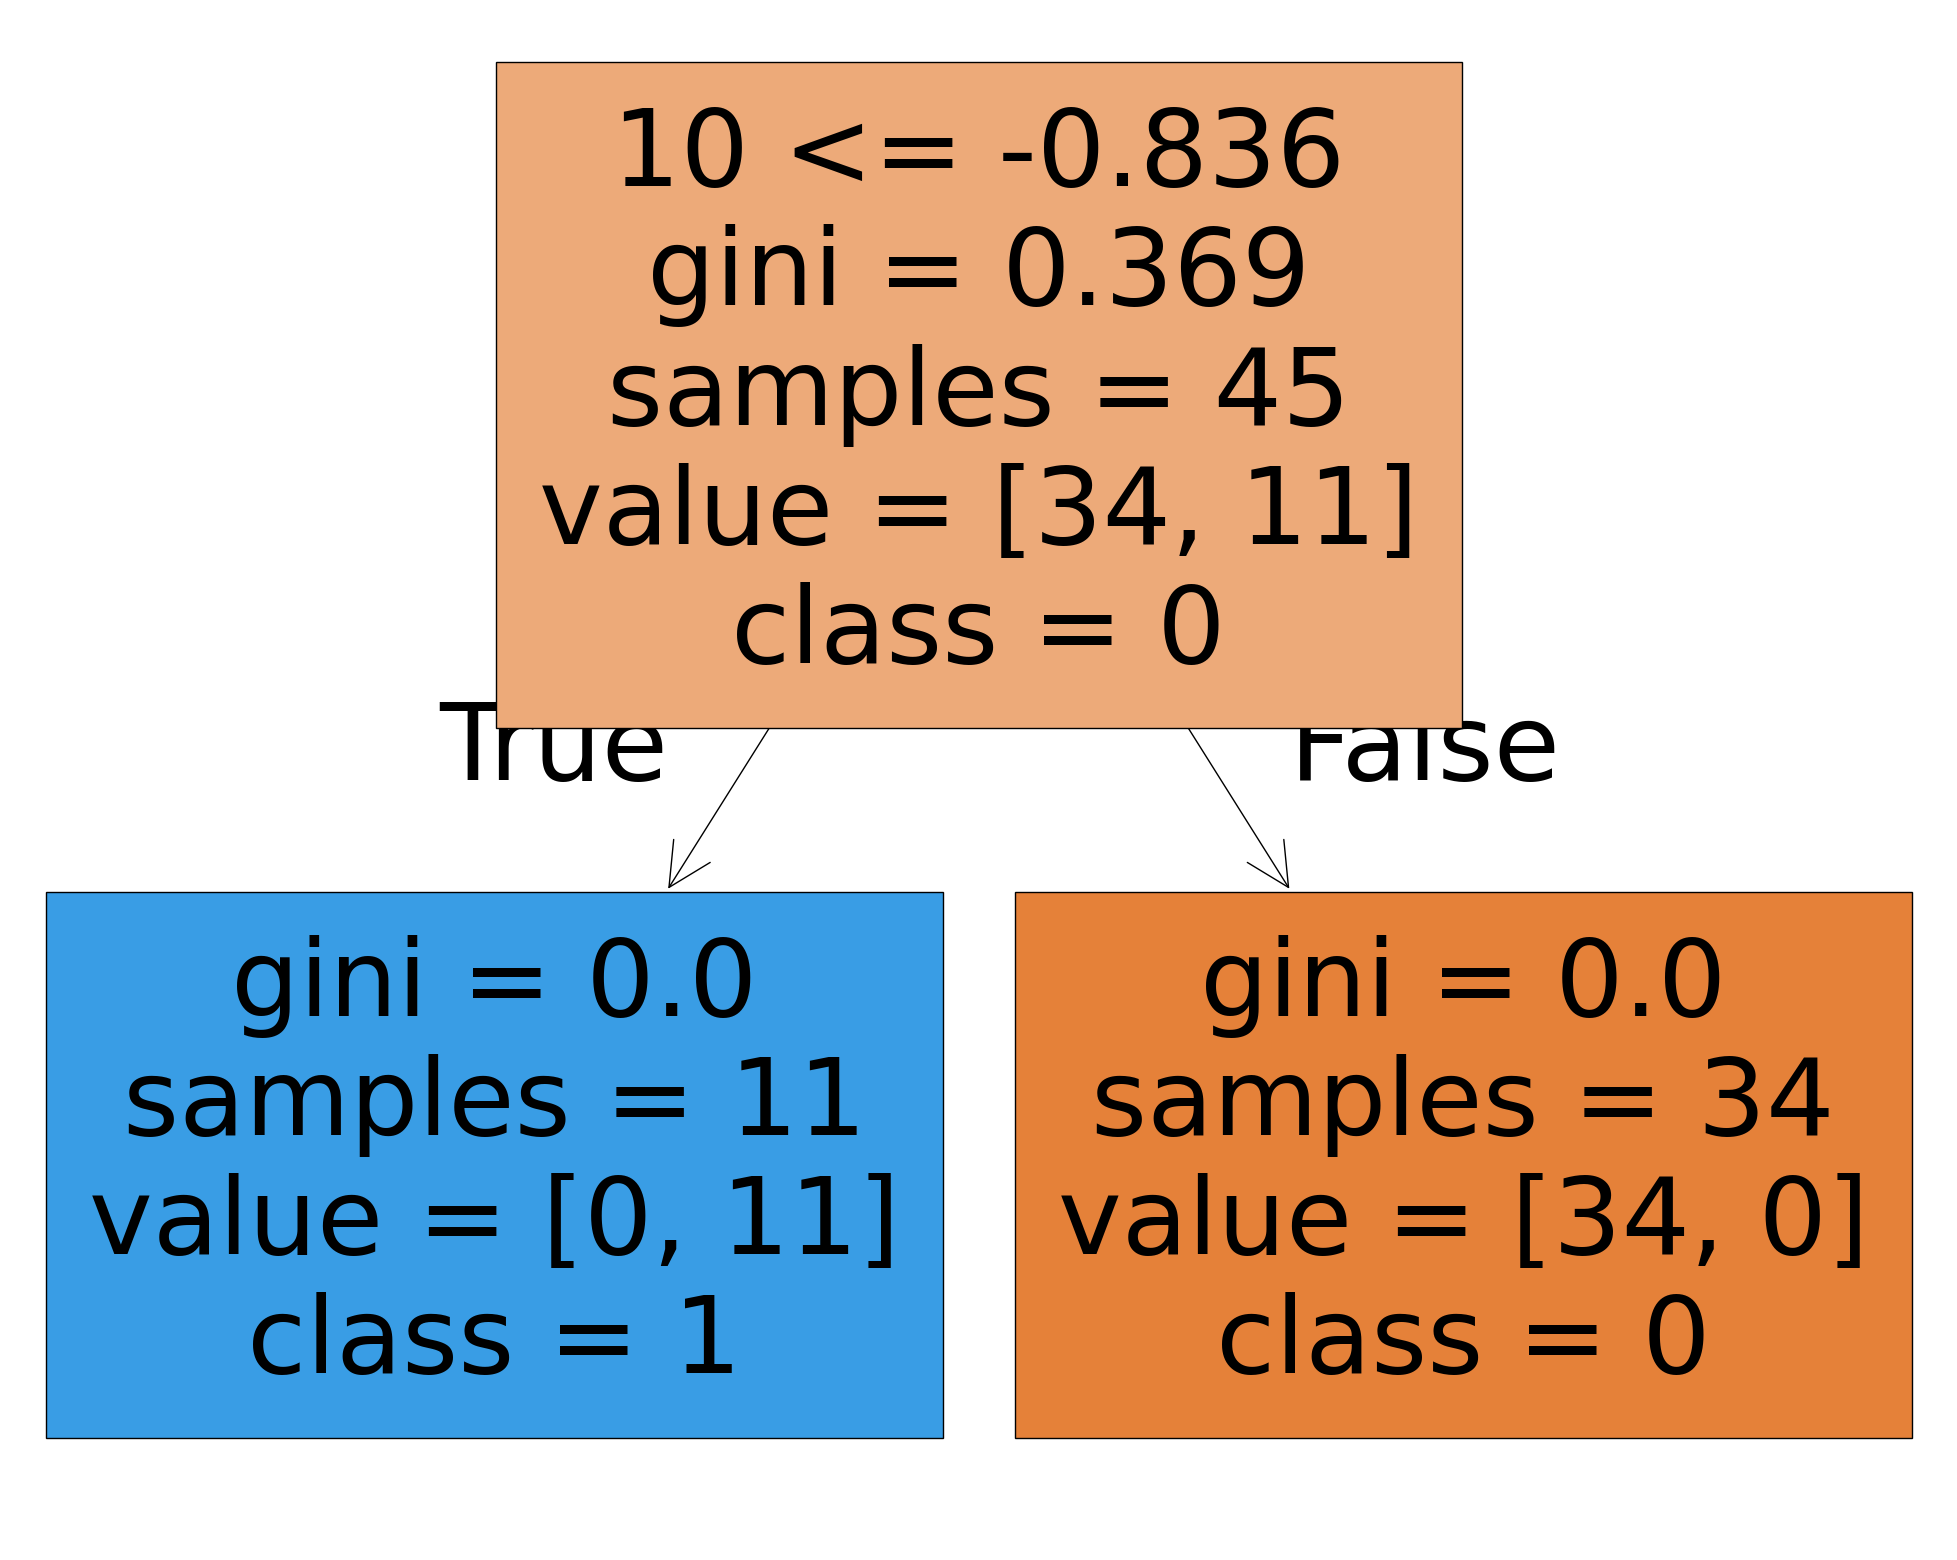

In [31]:
# Visualize the rules of the decision tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=learningFrame.drop(['tsne_labels'],axis=1).columns,  
                   class_names=['0', '1'],
                   filled=True)
